# 👋 🌍 I'm a Jupyter Notebook

### ✨ I can show rich text with [Markdown](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)

For more help with markdown, click `Help` -> `Markdown Reference`. From there, you can learn more by clicking `Try our 10 minute markdown tutorial` button.

I can render math with [MathJax](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Typesetting%20Equations.html):

$$\Large\tau > \pi$$

### 🐍 I can execute code

In [1]:
print(f"I can calculate with Python! {1+1=}")

I can calculate with Python! 1+1=2


### 🐚 I can use terminal commands

Prefix shell commands with `!`, or add `%%bash` to the top of a cell:

In [2]:
%%bash
ogrinfo --version

GDAL 3.6.4, released 2023/04/17


In [3]:
# Loop with Python, print with shell:
for i in [1, 2, 3]:
    !echo {i}

1
2
3


### 💾 I can download data

With this special `%%script` notation, Python variables can be shared with shell code and re-used multiple times.

In [4]:
# A _very_ rough boundary of Greenland from https://github.com/johan/world.geo.json
geojson_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries/GRL.geo.json"
geojson_filename = "greenland-border.geojson"

In [6]:
%%script env GEOJSON_FILENAME="$geojson_filename" GEOJSON_URL="$geojson_url" bash
curl "$GEOJSON_URL" --output "$GEOJSON_FILENAME"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2886  100  2886    0     0  66015      0 --:--:-- --:--:-- --:--:-- 65590


### 🔍 I can inspect data

In [7]:
%%script env GEOJSON_FILENAME="$geojson_filename" bash

# Documentation: https://gdal.org/programs/ogrinfo.html
ogrinfo -al -geom=SUMMARY "$GEOJSON_FILENAME"

INFO: Open of `greenland-border.geojson'
      using driver `GeoJSON' successful.

Layer name: greenland-border
Geometry: Polygon
Feature Count: 1
Extent: (-73.297000, 60.036760) - (-12.208550, 83.645130)
Layer SRS WKT:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]
Data axis to CRS axis mapping: 2,1
id: String (0.0)
name: String (0.0)
OGRFeature(greenland-border):0
  id (String) = GRL
  name (String) = Greenland
  POLYGON : 132 points



Above, we can see that the `EPSG:4326` CRS was detected. That's the "default" CRS for GeoJSON data. The raw data actually has no CRS encoded.

This can be verified by opening the GeoJSON file in a text editor (right click -> `Open With` -> `Editor`)

### 🗺️ I can show maps and plots

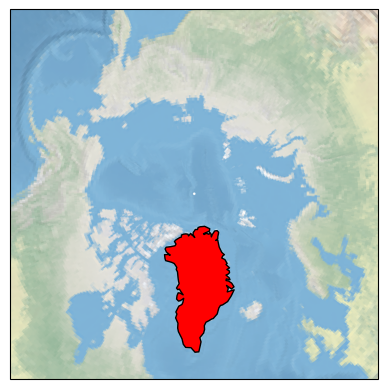

In [8]:
import cartopy.crs as ccrs
import geopandas
import matplotlib.pyplot as plt

ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=-45))
ax.set_extent([-180, 180, 90, 55], crs=ccrs.PlateCarree())
ax.stock_img()

data = geopandas.read_file(geojson_filename)
ax.add_geometries(
    data.geometry,
    crs=ccrs.PlateCarree(),
    facecolor="red",
    edgecolor="black",
)

plt.show()

## 🛠️ TODO

* Maybe programmatically generate a random distribution of points over an
  area in Greenland (e.g. use the extent of "Greenland coastlines 2017" layer as the
  x/y extents for random-number generation, then filter those random coordinates
  using the "Greenland coastlines 2017" layer).
* Maybe filter the "Place names database" layer by:
    * Random sample
    * Maximum of a particular attribute